In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

/home/vicky/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/vicky/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("../Large_data/feature/bnp-paribas-card-claim/train.csv", nrows=50000)
data.shape

(50000, 133)

In [3]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(50000, 114)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target","ID"], axis =1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((35000, 112), (15000, 112))

In [5]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.00256441, 0.00469967, 0.00504948, 0.00455907, 0.00423891,
       0.00593555, 0.00365907, 0.00240863, 0.02459093, 0.00464262,
       0.01731498, 0.00782867, 0.02322575, 0.0041868 , 0.00652283,
       0.002206  , 0.00218959, 0.00573601, 0.00290177, 0.01172972,
       0.        , 0.0048229 , 0.00416386, 0.00180367, 0.00357962,
       0.00287429, 0.00229197, 0.00726615, 0.00849688, 0.00358499,
       0.0049023 , 0.00437402, 0.00708566, 0.00653493, 0.00719272,
       0.00306401, 0.00547232, 0.00468289, 0.00519766, 0.00482681,
       0.00667566, 0.00410989, 0.00489949, 0.03906914, 0.00364546,
       0.00127286, 0.00554653, 0.0031027 , 0.00609789, 0.0016405 ,
       0.00447928, 0.00129345, 0.00488997, 0.01576876, 0.00735181,
       0.00643589, 0.00816104, 0.00053066, 0.00106013, 0.00358061,
       0.00464169, 0.0040551 , 0.00354651, 0.00651915, 0.0041788 ,
       0.00040801, 0.00448871, 0.00408575, 0.007419  , 0.00294922,
       0.00527929, 0.0037855 , 0.00138351, 0.00175572, 0.00564

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False)

v50     0.039069
v10     0.024591
v14     0.023226
v12     0.017315
v62     0.015769
          ...   
v78     0.000408
v115    0.000000
v124    0.000000
v23     0.000000
v102    0.000000
Length: 112, dtype: float64

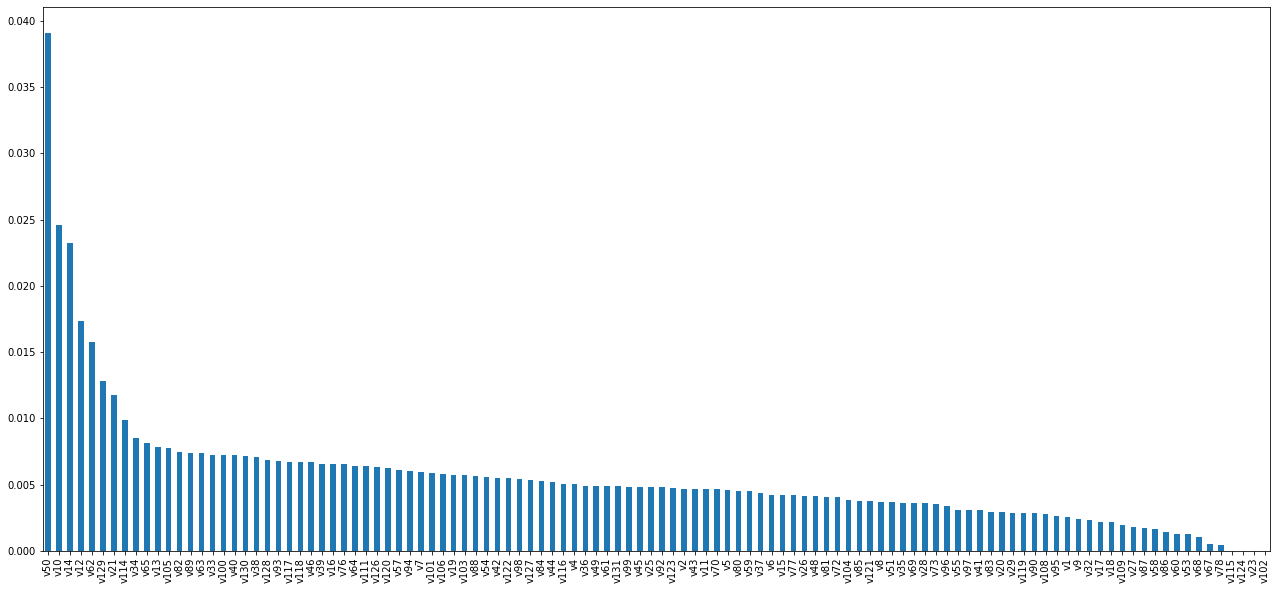

In [19]:
mi.sort_values(ascending = False).plot.bar(figsize=(22,10))

In [20]:
sel = SelectKBest(mutual_info_classif, k =10).fit(X_train.fillna(0), y_train)
X_train.columns[sel.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v46', 'v50', 'v62', 'v93', 'v114', 'v129'], dtype='object')

In [22]:
data = pd.read_csv("../Large_data/feature/house-prices/train.csv", nrows=50000)
data.shape

(1460, 81)

In [23]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(1460, 38)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["SalePrice"], axis =1),
    data["SalePrice"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((1022, 37), (438, 37))

In [26]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False)

OverallQual      0.531278
GrLivArea        0.481061
TotalBsmtSF      0.384123
GarageCars       0.370237
GarageArea       0.366434
YearBuilt        0.342637
1stFlrSF         0.311617
FullBath         0.275461
GarageYrBlt      0.269484
MSSubClass       0.251413
YearRemodAdd     0.244869
2ndFlrSF         0.231633
LotFrontage      0.206166
TotRmsAbvGrd     0.188418
Fireplaces       0.179885
OpenPorchSF      0.172900
LotArea          0.165635
BsmtFinSF1       0.162058
MasVnrArea       0.113831
BsmtUnfSF        0.111928
OverallCond      0.105445
HalfBath         0.074687
WoodDeckSF       0.073244
KitchenAbvGr     0.047382
BedroomAbvGr     0.038041
BsmtFullBath     0.027797
ScreenPorch      0.020041
EnclosedPorch    0.008437
LowQualFinSF     0.004701
3SsnPorch        0.002057
BsmtFinSF2       0.001464
YrSold           0.000000
BsmtHalfBath     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

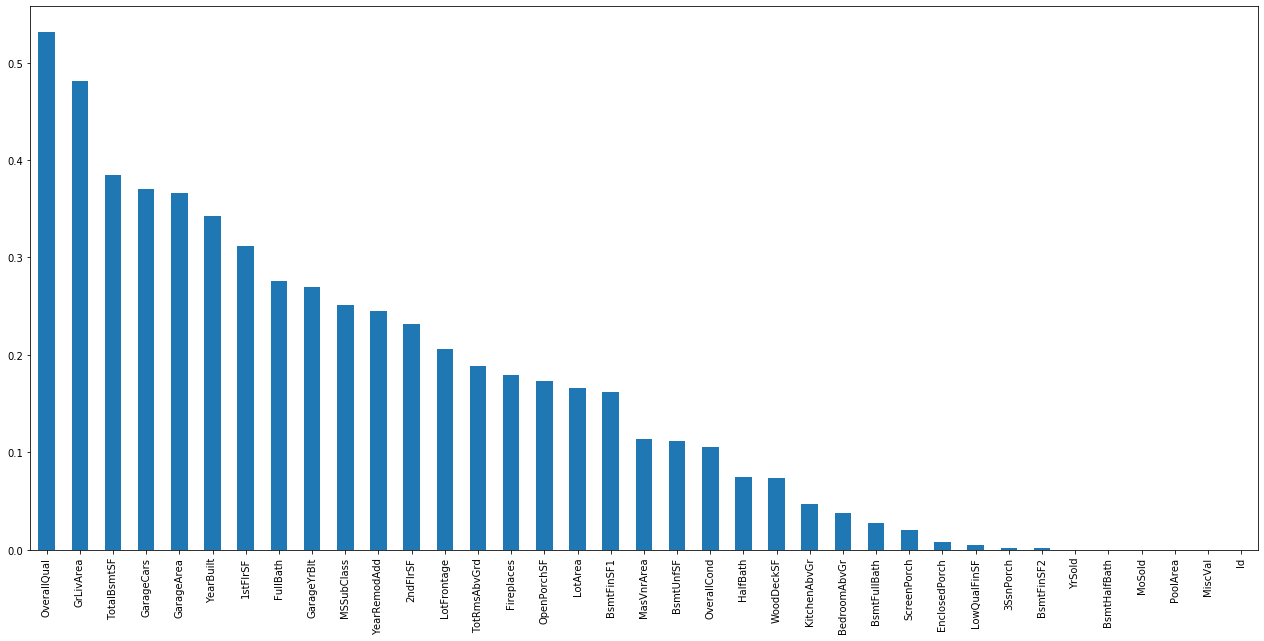

In [27]:
mi.sort_values(ascending = False).plot.bar(figsize=(22,10))

In [31]:
sel = SelectPercentile(mutual_info_regression, percentile=20).fit(X_train.fillna(0), y_train)
X_train.columns[sel.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')